In [1]:
# Import necessary libraries and suppress warnings
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # use Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # if only plt is imported
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Ensure inline plotting
%matplotlib inline

# For any future modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set a nice style for seaborn
sns.set(style='whitegrid')

In [3]:
# Load the dataset
data_path = r'E:\vs_code\Steam_games\data\a_steam_data_2021_2025.csv'
df = pd.read_csv(data_path)

# Quick glance at the data
print('Dataset shape:', df.shape)
print('Columns:', df.columns.tolist())


Dataset shape: (65521, 10)
Columns: ['appid', 'name', 'release_year', 'release_date', 'genres', 'categories', 'price', 'recommendations', 'developer', 'publisher']


In [4]:
# Convert release_date to datetime format and handle errors
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values by column:')
print(missing_values)

# Optionally, drop rows with missing critical data
critical_cols = ['release_date', 'price', 'recommendations']
df = df.dropna(subset=critical_cols)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

Missing values by column:
appid                 0
name                  0
release_year          0
release_date       1400
genres               66
categories            7
price                 0
recommendations       0
developer            53
publisher           183
dtype: int64


Numeric columns: ['appid', 'release_year', 'price', 'recommendations']


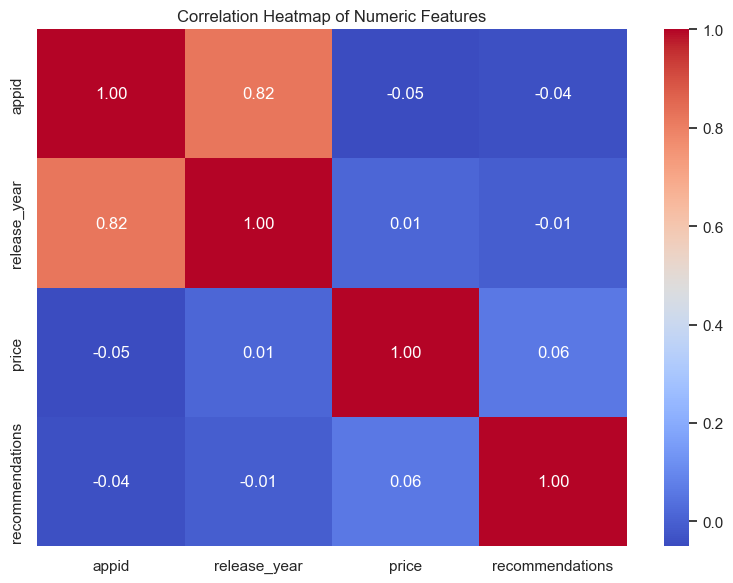

In [5]:
# Numeric data analysis
numeric_df = df.select_dtypes(include=[np.number])
print('Numeric columns:', numeric_df.columns.tolist())

# Generate correlation heatmap if there are 4 or more numeric columns
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(8, 6))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

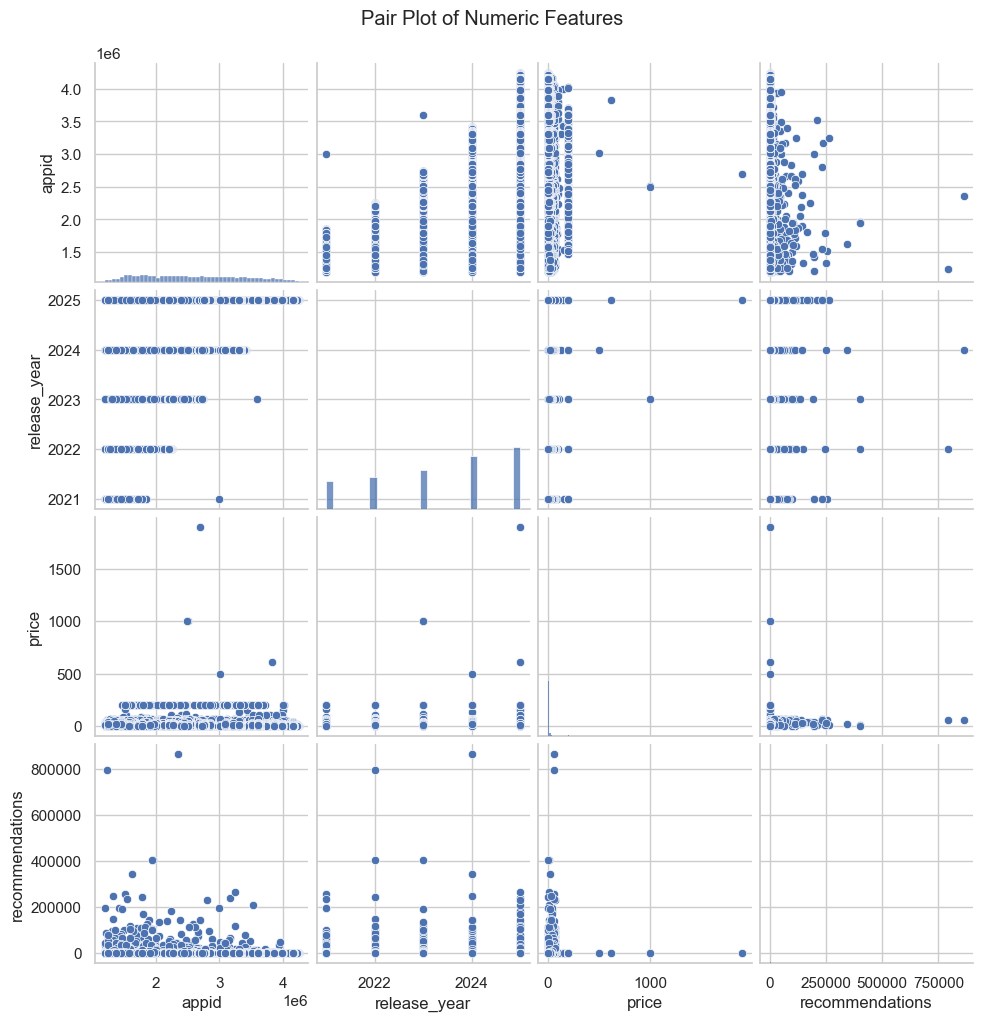

In [6]:
# Pair plot for numeric features
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

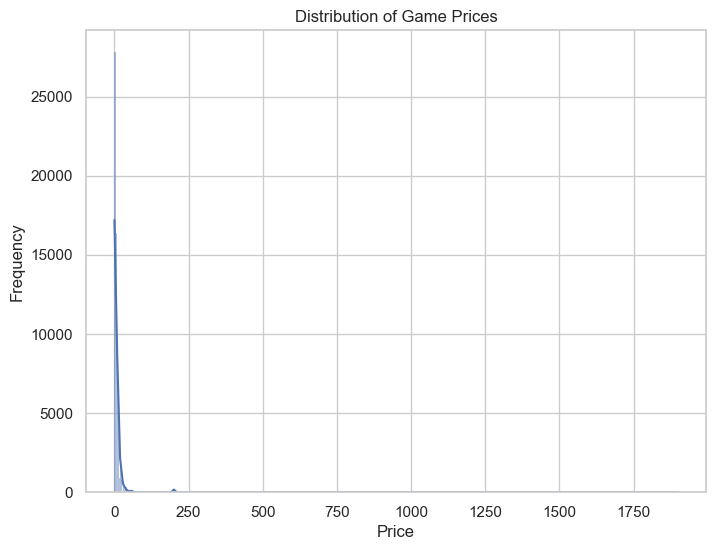

In [7]:
# Histogram for Price
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Game Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

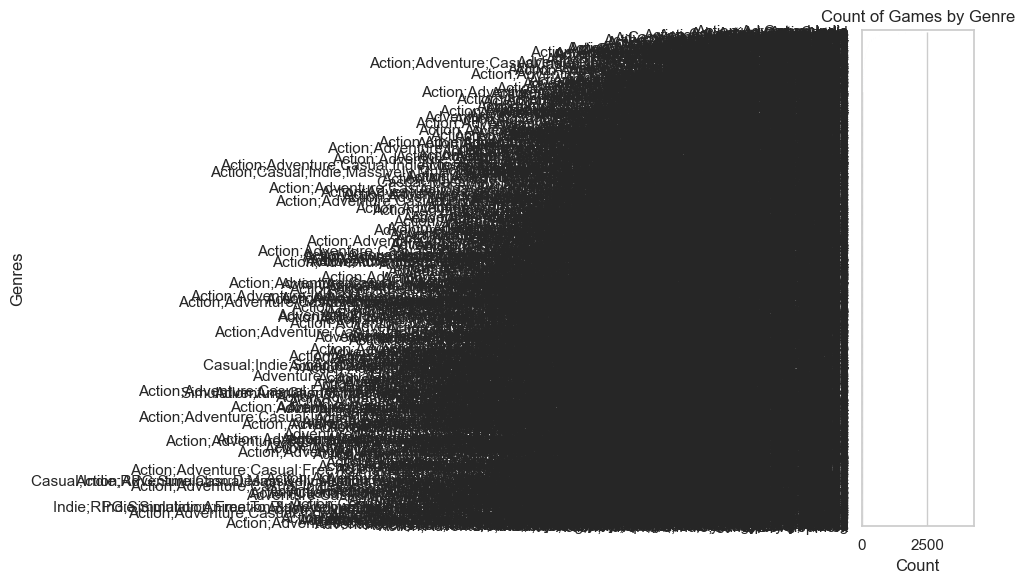

In [8]:
# Count plot for game genres
plt.figure(figsize=(10, 6))
sns.countplot(y=df['genres'], order=df['genres'].value_counts().index)
plt.title('Count of Games by Genre')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

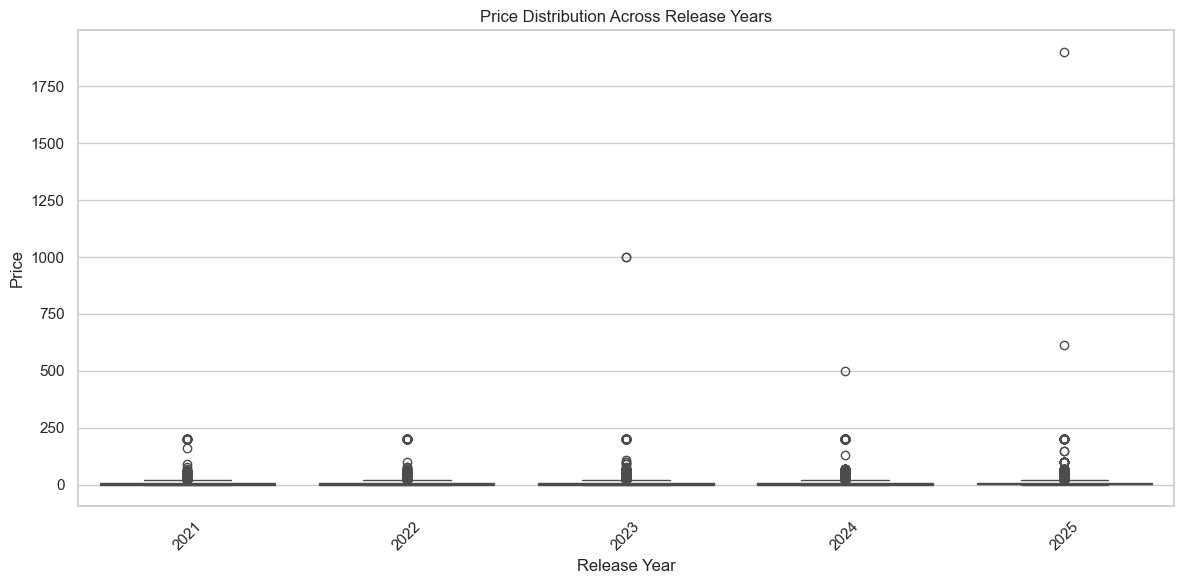

In [9]:
# Box plot of Price across different Release Years
plt.figure(figsize=(12, 6))
sns.boxplot(x='release_year', y='price', data=df)
plt.title('Price Distribution Across Release Years')
plt.xlabel('Release Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Select features and target for prediction
features = ['release_year', 'price']  # We use release_year and price as predictors
target = 'recommendations'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f'R^2 score of the model: {score:.3f}')

R^2 score of the model: 0.004


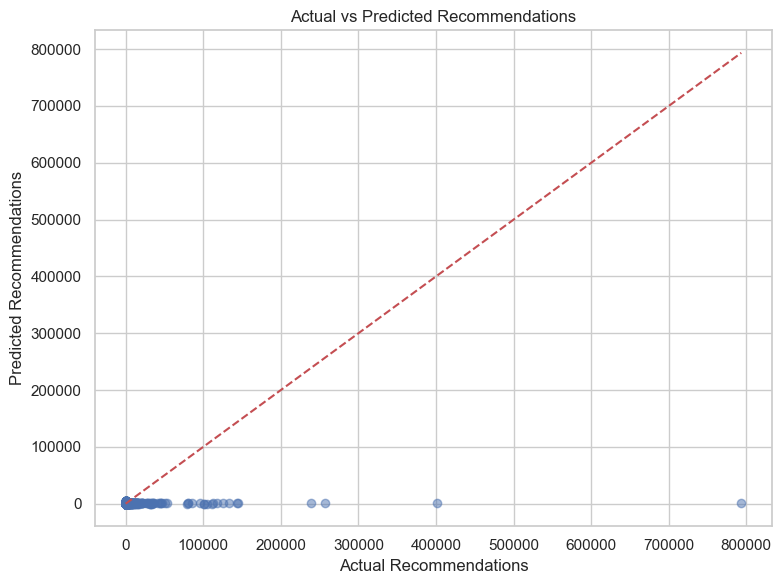

In [11]:
# Plotting Actual vs Predicted Recommendations
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Recommendations')
plt.ylabel('Predicted Recommendations')
plt.title('Actual vs Predicted Recommendations')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()